In [1]:
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [3]:
print len(tweets_data)
# print (tweets_data)

79359


In [4]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet:tweet['text'] if 'text' in tweet else ' ', tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang', None), tweets_data)

In [5]:
tweets.head()

,text,lang
0,ロシアの速攻からチェリシェフがサウジアラビアのDFを一気に2人かわして強いシュートをニアに撃...,ja
1,#RUS tiene los conceptos más claros que #KSA e...,es
2,Buyuk devrimci seriata bir darbe daha https://...,tr
3,C’était attendu mais c’est confirmé : le nivea...,fr
4,PINTOU O CAMPEÃO #RUS,pt


In [6]:
df = tweets[tweets['lang']=='en']
df.drop('lang',axis=1,inplace=True)
df.reset_index()
df.shape

(53758, 1)

## Basic Feature Extraction

 __Number of Words__

In [7]:
df['word_count'] = df['text'].apply(lambda x: len(str(x.encode('utf-8')).split(" ")))
df[['text','word_count']].head()

,text,word_count
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",10
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",10
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,21
44,RT @__yxsmeen: Some of us matured early becaus...,21
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,13


__Number of characters__

In [8]:
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','char_count']].head()

,text,char_count
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",100
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",100
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,142
44,RT @__yxsmeen: Some of us matured early becaus...,106
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,95


__Average Word Length__

In [9]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/float(len(words)))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",8.000000
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",8.000000
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,5.454545
44,RT @__yxsmeen: Some of us matured early becaus...,4.095238
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,6.384615


__Number of stopwords__

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",0
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",0
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,2
44,RT @__yxsmeen: Some of us matured early becaus...,7
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,3


__Number of special characters__

In [11]:
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text','hastags']].head()

,text,hastags
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",2
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",2
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,1
44,RT @__yxsmeen: Some of us matured early becaus...,0
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,0


__Number of numerics__

In [12]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",0
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",0
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,1
44,RT @__yxsmeen: Some of us matured early becaus...,0
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,0


__Number of Uppercase words__

In [13]:
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text','upper']].head()

,text,upper
21,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",2
30,"RT @SaudiNT_EN: 📷 | Moscow, it’s green 💚💚💚...",2
42,RT @TheTotallyShow: 🏆 COMPETITION 🏆\n\nThe #...,3
44,RT @__yxsmeen: Some of us matured early becaus...,1
45,RT @HashmiZikra: @Colorlines @namirari Ah yes ...,1


## Basic Pre-processing

__Lower case__

In [14]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

21    rt @saudint_en: 📷 | moscow, it’s green 💚💚💚...
30    rt @saudint_en: 📷 | moscow, it’s green 💚💚💚...
42    rt @thetotallyshow: 🏆 competition 🏆 the #wor...
44    rt @__yxsmeen: some of us matured early becaus...
45    rt @hashmizikra: @colorlines @namirari ah yes ...
Name: text, dtype: object

__Removing Punctuation__

In [15]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

21    rt saudint_en   moscow its green  rusksa world...
30    rt saudint_en   moscow its green  rusksa world...
42    rt thetotallyshow  competition  the worldcup k...
44    rt __yxsmeen some of us matured early because ...
45    rt hashmizikra colorlines namirari ah yes beca...
Name: text, dtype: object

__Removal of Stop Words__

In [16]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

21    rt saudint_en moscow green rusksa worldcupruss...
30    rt saudint_en moscow green rusksa worldcupruss...
42    rt thetotallyshow competition worldcup kicks t...
44    rt __yxsmeen us matured early life showed us w...
45    rt hashmizikra colorlines namirari ah yes worl...
Name: text, dtype: object

__Common word removal__

In [17]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

rt          36849
world       25258
cup         13999
worldcup     5879
win          4099
2026         3273
fifa         3195
us           3083
2018         2639
football     2616
dtype: int64

__Rare words__

In [18]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
freq

autob                 1
httpstcoocuojbxjxa    1
hdmirgbspdif          1
gggentry              1
obiasika              1
wifiaudiostreaming    1
togethernow           1
sbnations             1
hun                   1
cleave                1
dtype: int64

In [19]:
freq = list(freq.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

21    rt saudint_en moscow green rusksa worldcupruss...
30    rt saudint_en moscow green rusksa worldcupruss...
42    rt thetotallyshow competition worldcup kicks t...
44    rt __yxsmeen us matured early life showed us w...
45    rt hashmizikra colorlines namirari ah yes worl...
Name: text, dtype: object

__Spelling correction__

In [20]:
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

21    it saudint_en moscow green russia worldcupruss...
30    it saudint_en moscow green russia worldcupruss...
42    it thetotallyshow competition worldcup kicks t...
44    it __yxsmeen us matured early life showed us w...
45    it hashmizikra colorlines namirari ah yes worl...
Name: text, dtype: object

__Tokenization__

In [21]:
from nltk.tokenize import word_tokenize
df['text'][:5].apply(lambda x: word_tokenize(x))

21    [rt, saudint_en, moscow, green, rusksa, worldc...
30    [rt, saudint_en, moscow, green, rusksa, worldc...
42    [rt, thetotallyshow, competition, worldcup, ki...
44    [rt, __yxsmeen, us, matured, early, life, show...
45    [rt, hashmizikra, colorlines, namirari, ah, ye...
Name: text, dtype: object

__Stemming__

In [22]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

21    rt saudint_en moscow green rusksa worldcupruss...
30    rt saudint_en moscow green rusksa worldcupruss...
42    rt thetotallyshow competit worldcup kick today...
44    rt __yxsmeen us matur earli life show us worst...
45    rt hashmizikra colorlin namirari ah ye world h...
Name: text, dtype: object

__Lemmatization__

In [23]:
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

21    rt saudint_en moscow green rusksa worldcupruss...
30    rt saudint_en moscow green rusksa worldcupruss...
42    rt thetotallyshow competition worldcup kick to...
44    rt __yxsmeen u matured early life showed u wor...
45    rt hashmizikra colorlines namirari ah yes worl...
Name: text, dtype: object

##  Advance Text Processing

__Term frequency__

In [24]:
tf1 = df['text'][1:2].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,saudint_en,1
1,moscow,1
2,httpstcohauc8ouwul,1
3,green,1
4,rusksa,1
5,worldcuprussia2018,1
6,rt,1


__Inverse Document Frequency__

In [25]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['text'].str.contains(word)])))

tf1

,words,tf,idf
0,saudint_en,1,5.743003
1,moscow,1,5.164786
2,httpstcohauc8ouwul,1,10.199101
3,green,1,5.846439
4,rusksa,1,4.304065
5,worldcuprussia2018,1,4.983607
6,rt,1,0.000000


__Term Frequency – Inverse Document Frequency (TF-IDF)__

In [26]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,saudint_en,1,5.743003,5.743003
1,moscow,1,5.164786,5.164786
2,httpstcohauc8ouwul,1,10.199101,10.199101
3,green,1,5.846439,5.846439
4,rusksa,1,4.304065,4.304065
5,worldcuprussia2018,1,4.983607,4.983607
6,rt,1,0.000000,0.000000


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df['text'])

train_vect

<53758x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 340995 stored elements in Compressed Sparse Row format>

__ Bag of Words__

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['text'])
train_bow

<53758x1000 sparse matrix of type '<type 'numpy.int64'>'
	with 370904 stored elements in Compressed Sparse Row format>

__Sentiment Analysis__

In [29]:
df['text'][:5].apply(lambda x: TextBlob(x).sentiment)

21                          (-0.2, 0.3)
30                          (-0.2, 0.3)
42                           (0.0, 0.0)
44    (-0.266666666667, 0.533333333333)
45                           (0.0, 0.0)
Name: text, dtype: object

In [30]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['text','sentiment']].head()

,text,sentiment
21,rt saudint_en moscow green rusksa worldcupruss...,-0.200000
30,rt saudint_en moscow green rusksa worldcupruss...,-0.200000
42,rt thetotallyshow competition worldcup kick to...,0.000000
44,rt __yxsmeen u matured early life showed u wor...,-0.266667
45,rt hashmizikra colorlines namirari ah yes worl...,0.000000


In [31]:
df['label'] = df['sentiment'].apply(lambda x: 'neutral' if x == 0 \
                                              else 'positive' if (0.5 > x > 0) \
                                              else 'strongly positive' if (x > 0.5) \
                                              else 'negative'if (-0.5 < x < 0 ) else 'strongly negative')

In [32]:
df.head(30)

,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,label
21,rt saudint_en moscow green rusksa worldcupruss...,10,100,8.000000,0,2,0,2,-0.200000,negative
30,rt saudint_en moscow green rusksa worldcupruss...,10,100,8.000000,0,2,0,2,-0.200000,negative
42,rt thetotallyshow competition worldcup kick to...,21,142,5.454545,2,1,1,3,0.000000,neutral
44,rt __yxsmeen u matured early life showed u wor...,21,106,4.095238,7,0,0,1,-0.266667,negative
45,rt hashmizikra colorlines namirari ah yes worl...,13,95,6.384615,3,0,0,1,0.000000,neutral
46,rt beechschocolate win box chocolate simply pi...,24,144,5.041667,6,3,0,2,0.162500,positive
48,everything world,5,33,5.800000,1,0,0,0,0.000000,neutral
49,rt colinkahl german foreign minister identifie...,17,140,7.294118,1,0,0,1,0.168750,positive
50,rt barcacentre oliver kahn exgermany goalkeepe...,23,140,5.130435,5,0,0,3,0.000000,neutral
51,rt mxryse easy hide behind phone screen act li...,25,139,4.600000,6,0,0,2,0.177778,positive


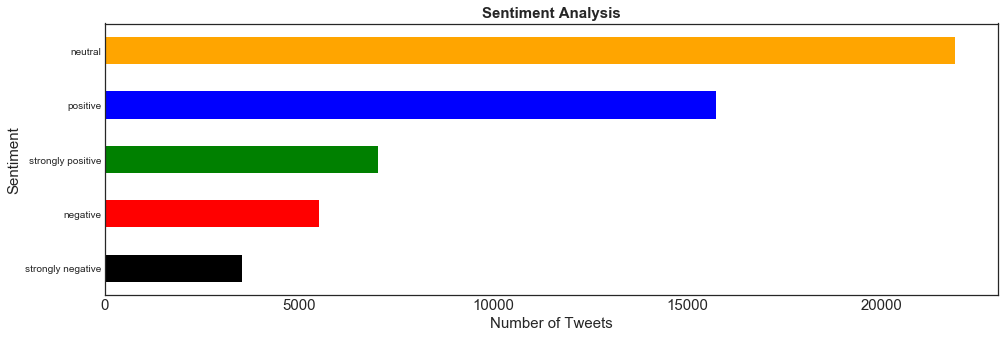

In [37]:
Sentiment_analysis = df['label'].value_counts(ascending=True)

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Sentiment', fontsize=15)
ax.set_xlabel('Number of Tweets' , fontsize=15)
ax.set_title('Sentiment Analysis', fontsize=15, fontweight='bold')
Sentiment_analysis[:].plot(ax=ax, kind='barh', color=['black','red','green','blue','orange'],figsize=(16,5))
plt.savefig('Sentiment_analysis.jpg',bbox_inches='tight', pad_inches=0.3);